# Introduction

Exploring relationship between mental health and student's CGPA.
Building logistic regression with Python on Student Mental Health Survey. 

# Import Data and Python Packages

In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
#load dataset
df = pd.read_csv("Student Mental Health.csv",header=0)

In [3]:
#inspect data
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
# shape of the dataframe
df.shape

# data type of each column
df.dtypes

# number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

# Data quality & Missing value check

In [5]:
#number of unique value
df.nunique()

Timestamp                                       92
Choose your gender                               2
Age                                              7
What is your course?                            49
Your current year of Study                       7
What is your CGPA?                               6
Marital status                                   2
Do you have Depression?                          2
Do you have Anxiety?                             2
Do you have Panic attack?                        2
Did you seek any specialist for a treatment?     2
dtype: int64

In [6]:
#null value check
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [7]:
#fixing duplicated data (CGPA)

print("CGPA column values:", df['What is your CGPA?'].unique())
df['What is your CGPA?']=np.where(df['What is your CGPA?'] =='3.50 - 4.00 ', '3.50 - 4.00', df['What is your CGPA?'])
print("After fixing CGPA column values:", df['What is your CGPA?'].unique())

#fixing duplicated data (Year)

print("Year column values:", df['Your current year of Study'].unique())
df['Your current year of Study']=np.where(df['Your current year of Study'] =='Year 1', 'year 1', df['Your current year of Study'])
df['Your current year of Study']=np.where(df['Your current year of Study'] =='Year 2', 'year 2', df['Your current year of Study'])
df['Your current year of Study']=np.where(df['Your current year of Study'] =='Year 3', 'year 3', df['Your current year of Study'])

print("After fixing CGPA column values:", df['Your current year of Study'].unique())




CGPA column values: ['3.00 - 3.49' '3.50 - 4.00' '3.50 - 4.00 ' '2.50 - 2.99' '2.00 - 2.49'
 '0 - 1.99']
After fixing CGPA column values: ['3.00 - 3.49' '3.50 - 4.00' '2.50 - 2.99' '2.00 - 2.49' '0 - 1.99']
Year column values: ['year 1' 'year 2' 'Year 1' 'year 3' 'year 4' 'Year 2' 'Year 3']
After fixing CGPA column values: ['year 1' 'year 2' 'year 3' 'year 4']


In [8]:
#get rid of null value
df = df.dropna(how='any',axis=0)

#copy dataframe
train_data = df.copy()

# Exploratory Data Analysis

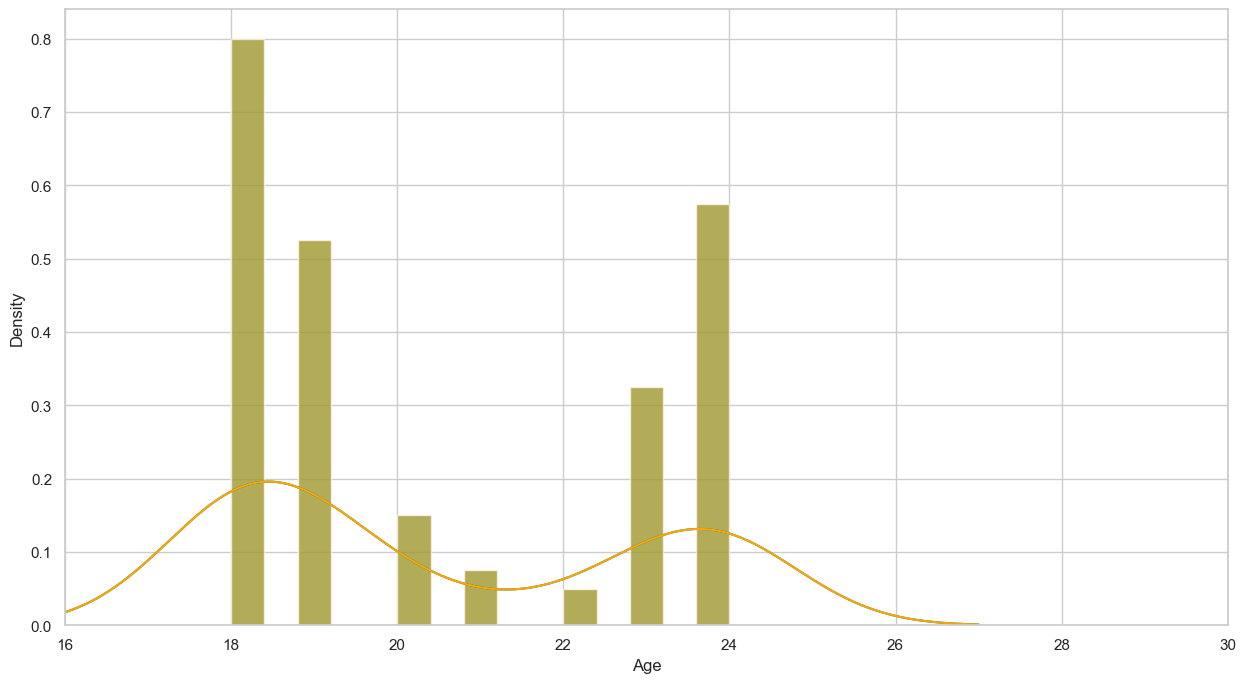

In [9]:
#age distribution
plt.figure(figsize=(15,8))
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.set(xlabel='Age')
plt.xlim(16,30)
plt.show()

In [10]:
#rename columns
train_data.rename(columns = {'Choose your gender': 'gender', 
                     'Do you have Depression?': 'depression_status',
                     'Do you have Panic attack?': 'panic_status',
                     'Do you have Anxiety?': 'anxiety_status',
                     'Timestamp': 'timestamp',
                     'What is your CGPA?': 'cgpa',
                     'Age': 'age',
                     'What is your course?': 'course',
                     'Your current year of Study': 'year',
                     'Marital status': 'marital_status',
                     'Did you seek any specialist for a treatment?': 'treatment_seek'}, inplace = True)


In [11]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["depression_status","panic_status","anxiety_status","cgpa","gender", "year"])
training.drop('timestamp', axis=1, inplace=True)
training.drop('course', axis=1, inplace=True)
training.drop('marital_status', axis=1, inplace=True)
training.drop('treatment_seek', axis=1, inplace=True)

final_train = training
final_train.head()

,age,depression_status_No,depression_status_Yes,panic_status_No,panic_status_Yes,anxiety_status_No,anxiety_status_Yes,cgpa_0 - 1.99,cgpa_2.00 - 2.49,cgpa_2.50 - 2.99,cgpa_3.00 - 3.49,cgpa_3.50 - 4.00,gender_Female,gender_Male,year_year 1,year_year 2,year_year 3,year_year 4
0,18.0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0
1,21.0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0
2,19.0,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0
3,22.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0
4,23.0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1


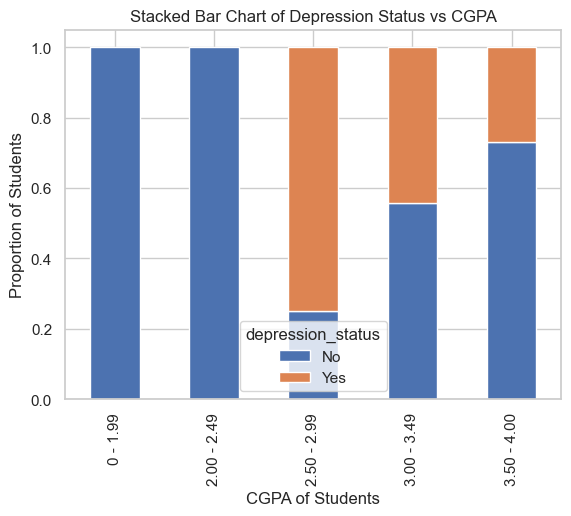

In [12]:
#distribution of depression among students by cgpa
table=pd.crosstab(train_data['cgpa'],train_data['depression_status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Depression Status vs CGPA')
plt.xlabel('CGPA of Students')
plt.ylabel('Proportion of Students')
plt.savefig('depression_vs_cgpa_stack')

In [13]:
#count depression and anxiety
print(sum((train_data['depression_status'] == 'Yes')) / len(train_data) * 100, "% of students have depression")
print(sum((train_data['depression_status'] == 'Yes') & (train_data['anxiety_status'] == 'Yes')) / len(train_data) * 100, "% of students have depression and anxiety")
print(sum((train_data['depression_status'] == 'Yes') & (train_data['anxiety_status'] == 'Yes') & (train_data['panic_status'] == 'Yes')) / len(train_data) * 100, "% of students have depression and anxiety and panic attack")

35.0 % of students have depression
18.0 % of students have depression and anxiety
10.0 % of students have depression and anxiety and panic attack


Text(0, 0.5, 'Proportion of Students')

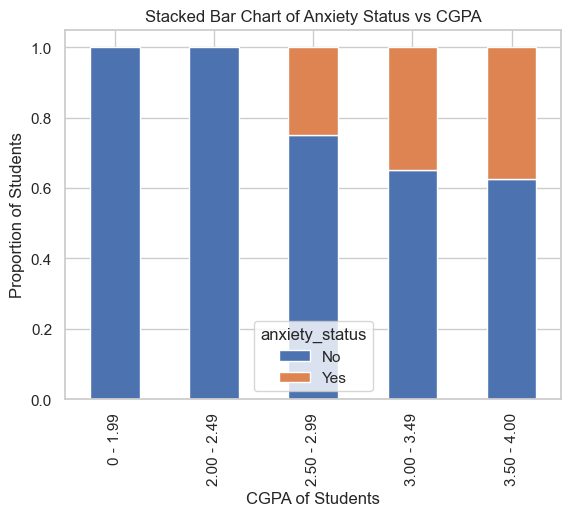

In [14]:
table=pd.crosstab(train_data['cgpa'],train_data['anxiety_status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Anxiety Status vs CGPA')
plt.xlabel('CGPA of Students')
plt.ylabel('Proportion of Students')

Text(0.5, 0, 'CGPA of Students')

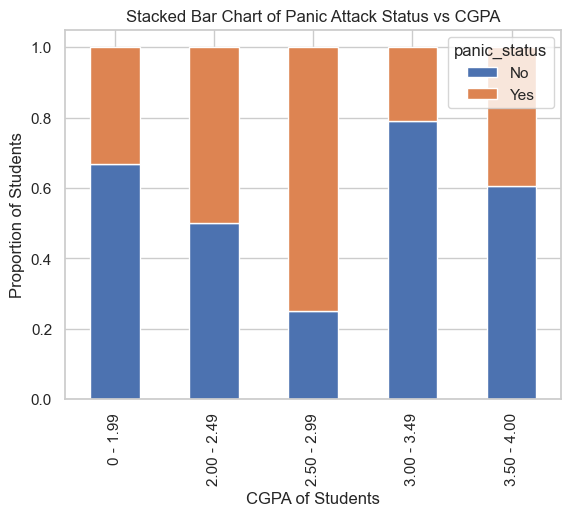

In [15]:
table=pd.crosstab(train_data['cgpa'],train_data['panic_status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Panic Attack Status vs CGPA')
plt.ylabel('Proportion of Students')
plt.xlabel('CGPA of Students')

Text(0, 0.5, 'Proportion of Students')

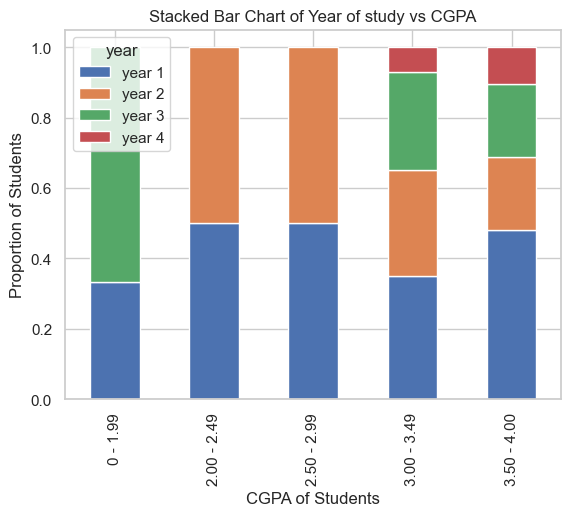

In [16]:
table=pd.crosstab(train_data['cgpa'],train_data['year'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Year of study vs CGPA')
plt.xlabel('CGPA of Students')
plt.ylabel('Proportion of Students')

Text(0, 0.5, 'Proportion of Students')

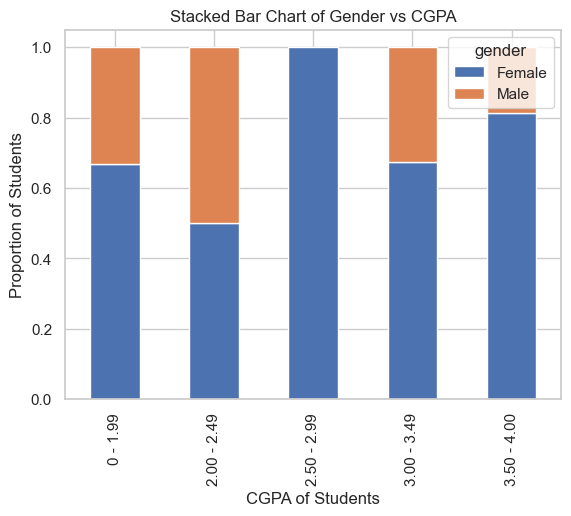

In [17]:
table=pd.crosstab(train_data['cgpa'],train_data['gender'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Gender vs CGPA')
plt.xlabel('CGPA of Students')
plt.ylabel('Proportion of Students')

# Logistic Regression

## Recursive feature elimination

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["cgpa_0 - 1.99", "cgpa_2.00 - 2.49", "cgpa_2.50 - 2.99", "cgpa_3.00 - 3.49", "cgpa_3.50 - 4.00", "gender_Male", "gender_Female",  "year_year 1",  "year_year 2",  "year_year 3",  "year_year 4"] 
X = final_train[cols]
y = final_train['panic_status_Yes']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, step = 7)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['cgpa_0 - 1.99', 'cgpa_2.50 - 2.99', 'cgpa_3.00 - 3.49', 'year_year 3', 'year_year 4']


## Feature ranking with recursive feature elimination and cross-validation

Optimal number of features: 2
Selected features: ['cgpa_3.00 - 3.49', 'year_year 4']


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


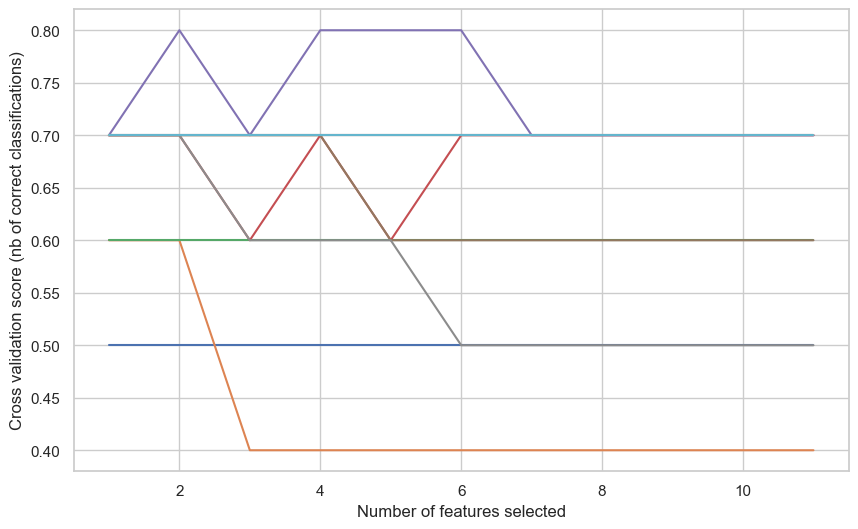

In [19]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

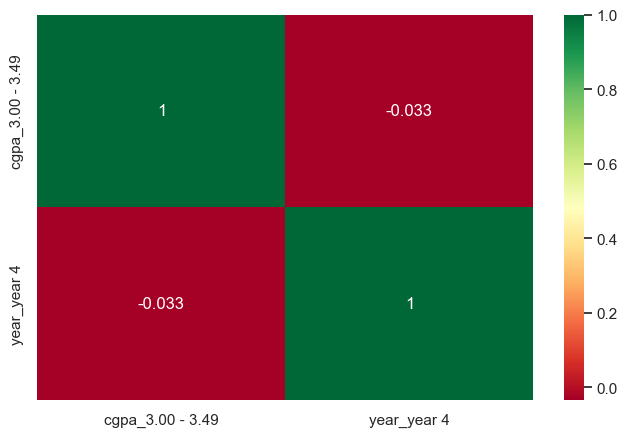

In [20]:
Selected_features = ['cgpa_3.00 - 3.49', 'year_year 4']
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

## Model evaluation based on simple train/test split using train_test_split() function

Train/Test split results:
LogisticRegression accuracy is 0.550
LogisticRegression log_loss is 0.713
LogisticRegression auc is 0.485


/var/folders/p9/1cnldwg52d39t1tmjhv1ml5r0000gn/T/ipykernel_21483/541457379.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
/var/folders/p9/1cnldwg52d39t1tmjhv1ml5r0000gn/T/ipykernel_21483/541457379.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')


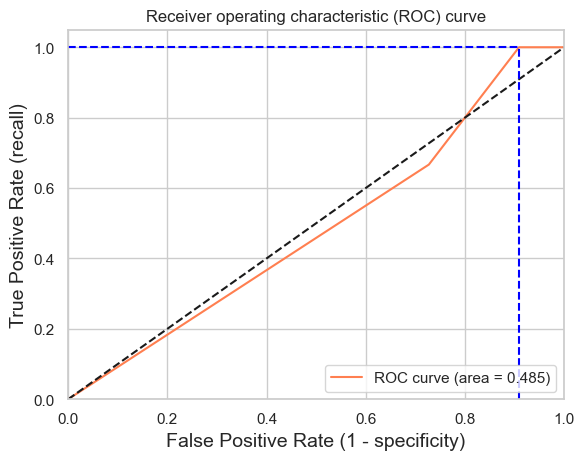

Using a threshold of 0.277 guarantees a sensitivity of 1.000 and a specificity of 0.091, i.e. a false positive rate of 90.91%.


In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['depression_status_Yes']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

## Model evaluation based on K-fold cross-validation using cross_val_score() function

In [22]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.650
LogisticRegression average log_loss is 0.638
LogisticRegression average auc is 0.602


## Model evaluation based on K-fold cross-validation using cross_validate() function

In [23]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.650 (+/-0.050)
LogisticRegression average log_loss: 0.638 (+/-0.058)
LogisticRegression average auc: 0.602 (+/-0.169)
